# More occuring fragments in COCONUT dataset in comparison to ZINC dataset

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

from ast import literal_eval
import re
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles

### Making feature pointwise mutual information profiles

In [9]:
profile = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp_386297.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=386297)
profile.df

value
feature1                                           feature2                                                 
[CH2][CH2][CH2][CH2][CH]                           [CH2][CH2][CH2][CH2][CH]                            15582
                                                   [CH2][CH2][CH]([C]([CH2])=[O])[CH]([CH2])[CH2]         11
                                                   [CH2][CH2][C](=[O])[CH]([CH2])[CH]                    139
                                                   [CH3][CH2][CH2][CH2]                                 7133
                                                   [CH3][CH2][CH2][CH2][CH2]                            6905
...                                                                                                      ...
[C][c]([c])[cH][cH][cH]                            [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...      1
[C][c]([c])[c]([OH])[cH][cH]                       [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...      1
[C][c]([c])[c]([cH][cH])[C]([C])=[O]               [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...      1
[cH][cH][cH][c]([c])[OH]                           [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...      1
[c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([... [c][cH][cH][cH][c]                                      1

[18368174 rows x 1 columns]

In [10]:
probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(profile)
probability_profile.df

value
feature1                                           feature2                                                    
[CH2][CH2][CH2][CH2][CH]                           [CH2][CH2][CH2][CH2][CH]                            0.040337
                                                   [CH2][CH2][CH]([C]([CH2])=[O])[CH]([CH2])[CH2]      0.000028
                                                   [CH2][CH2][C](=[O])[CH]([CH2])[CH]                  0.000360
                                                   [CH3][CH2][CH2][CH2]                                0.018465
                                                   [CH3][CH2][CH2][CH2][CH2]                           0.017875
...                                                                                                         ...
[C][c]([c])[cH][cH][cH]                            [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...  0.000003
[C][c]([c])[c]([OH])[cH][cH]                       [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...  0.000003
[C][c]([c])[c]([cH][cH])[C]([C])=[O]               [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...  0.000003
[cH][cH][cH][c]([c])[OH]                           [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...  0.000003
[c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([... [c][cH][cH][cH][c]                                  0.000003

[18368174 rows x 1 columns]

In [11]:
reference_profile = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp_379012.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=379012)
reference_profile.df

value
feature1                           feature2                                
[CH2][CH2][CH2][CH2][CH2]          [CH2][CH2][CH2][CH2][CH2]          20003
                                   [CH2][CH2][S][c]([n])[n]             143
                                   [C][CH2][CH2][CH2][CH2]             3587
                                   [cH][cH][cH][cH][cH]                2802
                                   [cH][cH][cH][cH][c]                 4376
...                                                                     ...
[CH][CH2][CH2][S]([CH2])(=[O])=[O] [CH][NH][CH2][S]([CH2])(=[O])=[O]      1
                                   [C][CH]([CH2])[NH][CH2][S]             1
[CH][NH][CH2][S]([CH2])(=[O])=[O]  [C][CH]([CH2])[NH][CH2][S]             1
                                   [C][CH]([NH])[CH2][CH2][S]             1
[C][CH]([CH2])[NH][CH2][S]         [C][CH]([NH])[CH2][CH2][S]             1

[13960003 rows x 1 columns]

In [12]:
reference_probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(reference_profile)
reference_probability_profile.df

value
feature1                           feature2                                   
[CH2][CH2][CH2][CH2][CH2]          [CH2][CH2][CH2][CH2][CH2]          0.052777
                                   [CH2][CH2][S][c]([n])[n]           0.000377
                                   [C][CH2][CH2][CH2][CH2]            0.009464
                                   [cH][cH][cH][cH][cH]               0.007393
                                   [cH][cH][cH][cH][c]                0.011546
...                                                                        ...
[CH][CH2][CH2][S]([CH2])(=[O])=[O] [CH][NH][CH2][S]([CH2])(=[O])=[O]  0.000003
                                   [C][CH]([CH2])[NH][CH2][S]         0.000003
[CH][NH][CH2][S]([CH2])(=[O])=[O]  [C][CH]([CH2])[NH][CH2][S]         0.000003
                                   [C][CH]([NH])[CH2][CH2][S]         0.000003
[C][CH]([CH2])[NH][CH2][S]         [C][CH]([NH])[CH2][CH2][S]         0.000003

[13960003 rows x 1 columns]

### Making feature pointwise KL divergence profile between COCONUT and ZINC

In [13]:
difference_pkld_profile = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(
    probability_profile, reference_probability_profile)
difference_pkld_profile.df

value
feature1                           feature2                                                
[CH2][CH2][CH2][CH2][CH]           [CH2][CH2][CH2][CH2][CH]                        1.847558
                                   [CH2][CH2][CH]([C]([CH2])=[O])[CH]([CH2])[CH2]  3.431965
                                   [CH2][CH2][C](=[O])[CH]([CH2])[CH]              5.091474
                                   [CH3][CH2][CH2][CH2]                            4.187864
                                   [CH3][CH2][CH2][CH2][CH2]                       4.440557
...                                                                                     ...
[CH][CH2][CH2][S]([CH2])(=[O])=[O] [CH][NH][CH2][S]([CH2])(=[O])=[O]              -0.027471
                                   [C][CH]([CH2])[NH][CH2][S]                     -0.027471
[CH][NH][CH2][S]([CH2])(=[O])=[O]  [C][CH]([CH2])[NH][CH2][S]                     -0.027471
                                   [C][CH]([NH])[CH2][CH2][S]                     -0.027471
[C][CH]([CH2])[NH][CH2][S]         [C][CH]([NH])[CH2][CH2][S]                     -0.027471

[30685450 rows x 1 columns]

### More occuring fragments in COCONUT dataset than in ZINC dataset

In [14]:
difference_pkld_profile.df.nlargest(50,"value")

value
feature1                                           feature2                                                     
[CH2]=[C]([CH])[C](=[O])[O][CH]                    [CH2]=[C]([CH])[C](=[O])[O][CH]                     11.962995
[CH2][CH]([O])[CH2][O][P]                          [CH]=[CH][CH2][CH2][CH2]                            11.586323
                                                   [CH][CH2][CH2][CH2][CH2]                            11.583097
[CH][O][CH2][CH]([CH])[OH]                         [C]=[CH][CH2][CH]([C])[C]                           11.531910
[CH][O][CH]([O][CH2])[CH]([CH])[OH]                [C][CH2][CH2][CH]([C])[C]                           11.517015
[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C] [CH][CH2][O][CH]([CH])[O]                           11.490694
[CH2]=[C]([CH])[C](=[O])[O][CH]                    [C][C](=[O])[O][CH]([CH])[CH]                       11.402989
[CH][CH]([OH])[CH]([OH])[CH2][O]                   [C]=[CH][CH2][CH]([C])[C]                           11.358395
[C]=[CH][CH2][CH]([C])[C]                          [C][C](=[O])[O][CH]([CH])[O]                        11.336668
[CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]              [CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]               11.309043
[CH2]=[C]([CH])[C](=[O])[O][CH]                    [CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]               11.286554
[CH][CH]([O])[CH2][OH]                             [CH][O][CH]([CH3])[CH]([CH])[O]                     11.280872
[CH][O][CH]([O][CH2])[CH]([CH])[OH]                [C]=[CH][CH2][CH]([C])[C]                           11.268880
[CH3][CH]([CH])[O][CH]([CH])[O]                    [C]=[CH][CH2][CH]([C])[C]                           11.242248
[CH][O][CH]([CH2][OH])[CH]([CH])[OH]               [CH][O][CH]([CH3])[CH]([CH])[O]                     11.192307
[CH][CH2][CH]=[C]([CH])[C]                         [CH][CH2][O][CH]([CH])[O]                           11.183813
[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C] [CH][O][CH2][CH]([CH])[OH]                          11.177715
[CH3][CH]([CH])[O][CH]([CH])[O]                    [CH][CH2][CH2][C]([CH])([CH3])[CH]                  11.157408
[CH2][CH]([C])[O][CH]([CH])[O]                     [CH][O][CH]([O][CH2])[CH]([CH])[OH]                 11.123550
[CH2][CH2][CH]([C]([CH])([CH3])[CH2])[C]([CH])(... [CH][CH]([OH])[CH]([OH])[CH]([O])[O]                11.117828
[C][c]([c])[cH][cH][c]                             [c][CH]=[C]([O][c])[C]([c])=[O]                     11.117510
[c][CH]([CH])[O][c]([c])[c]                        [c][CH]([CH])[O][c]([c])[c]                         11.100527
[CH]=[C]([O])[C](=[O])[c]([cH])[c]                 [CH]=[C]([O])[C](=[O])[c]([cH])[c]                  11.064629
                                                   [C][c]([c])[cH][cH][c]                              11.036602
[CH2][CH2][CH]([O][CH])[C]([CH3])([CH3])[CH]       [CH][CH2][CH2][C]([CH])([CH3])[CH]                  11.012138
[CH][CH2][CH2][C]([CH])([CH3])[CH]                 [CH][O][CH]([CH3])[CH]([CH])[OH]                    11.008020
[CH][CH]([OH])[CH]([OH])[CH]([CH2])[OH]            [C]=[CH][CH2][CH]([C])[C]                           11.003893
[CH2][CH2][CH]([C]([CH])([CH3])[CH2])[C]([CH])(... [CH][CH]([OH])[CH]([OH])[CH]([CH])[OH]              11.003890
[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C] [CH][CH]([OH])[CH]([OH])[CH2][O]                    10.992819
[CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]              [C][C](=[O])[O][CH]([CH])[CH]                       10.985860
[CH3][CH]([CH])[O][CH]([CH])[O]                    [CH][CH2][CH]=[C]([CH])[C]                          10.969010
[CH2][CH2][CH]([C]([CH])([CH3])[CH2])[C]([CH])(... [CH2][CH2][CH]([O][CH])[C]([CH3])([CH3])[CH]        10.967594
[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C] [CH3][CH]([CH])[O][CH]([CH])[O]                     10.961222
[CH]=[C]([O])[C](=[O])[c]([cH])[c]                 [c][CH]=[C]([O][c])[C]([c])=[O]                     10.959797
[CH2][CH2][CH]([C]([CH])([CH3])[CH2])[C

### Drawing those fragments

In [ ]:
# Combination [CH2]=[C]([CH])[C](=[O])[O][CH] and [CH2]=[C]([CH])[C](=[O])[O][CH] value: 11.962995

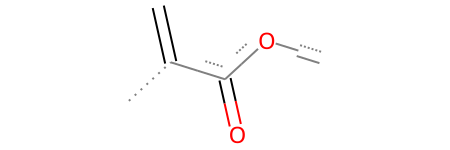

In [37]:
Chem.MolFromSmarts('[CH2]=[C]([CH])[C](=[O])[O][CH]')

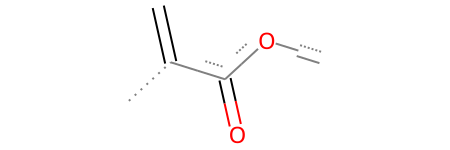

In [38]:
Chem.MolFromSmarts('[CH2]=[C]([CH])[C](=[O])[O][CH]')

In [ ]:
# Fragments [CH2][CH]([O])[CH2][O][P] and [CH]=[CH][CH2][CH2][CH2] value: 11.586323

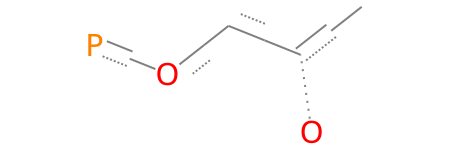

In [42]:
Chem.MolFromSmarts('[CH2][CH]([O])[CH2][O][P]')

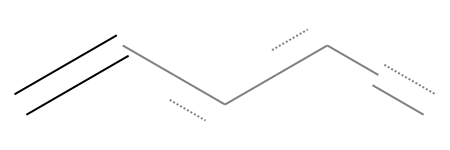

In [41]:
Chem.MolFromSmarts('[CH]=[CH][CH2][CH2][CH2]')

In [ ]:
## Fragments [CH2][CH]([O])[CH2][O][P] and [CH][CH2][CH2][CH2][CH2] 11.583097

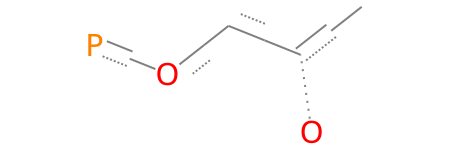

In [43]:
Chem.MolFromSmarts('[CH2][CH]([O])[CH2][O][P]')

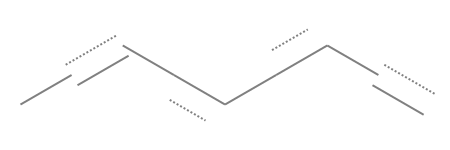

In [44]:
Chem.MolFromSmarts('[CH][CH2][CH2][CH2][CH2]')

In [ ]:
# Fragments [CH][O][CH2][CH]([CH])[OH] [C]=[CH][CH2][CH]([C])[C] 11.531910

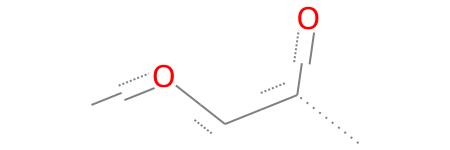

In [45]:
Chem.MolFromSmarts('[CH][O][CH2][CH]([CH])[OH]')

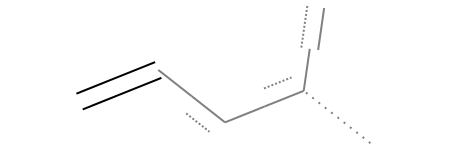

In [46]:
Chem.MolFromSmarts('[C]=[CH][CH2][CH]([C])[C]')

In [ ]:
# Fragments [CH][O][CH]([O][CH2])[CH]([CH])[OH] [C][CH2][CH2][CH]([C])[C] 11.517015

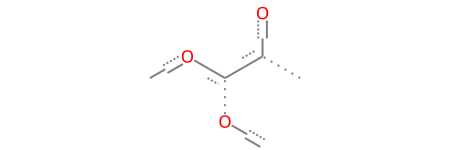

In [47]:
Chem.MolFromSmarts('[CH][O][CH]([O][CH2])[CH]([CH])[OH]')

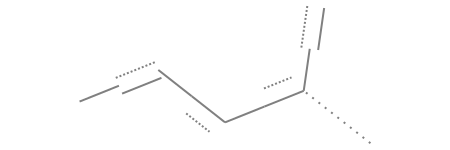

In [48]:
Chem.MolFromSmarts('[C][CH2][CH2][CH]([C])[C]')

In [ ]:
# Fragments [CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C] [CH][CH2][O][CH]([CH])[O] 11.490694

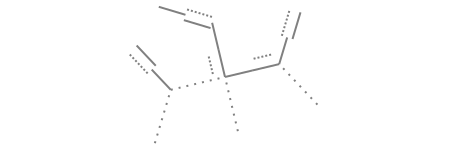

In [51]:
Chem.MolFromSmarts('[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C]')

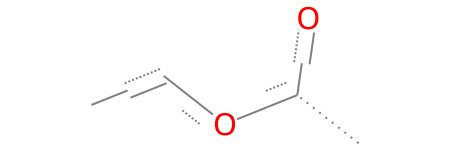

In [52]:
Chem.MolFromSmarts('[CH][CH2][O][CH]([CH])[O]')

In [ ]:
# Fragments [CH2]=[C]([CH])[C](=[O])[O][CH] [C][C](=[O])[O][CH]([CH])[CH] 11.402989

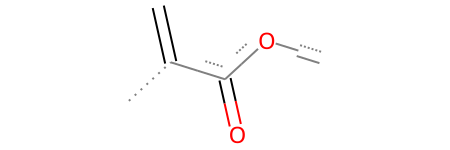

In [53]:
Chem.MolFromSmarts('[CH2]=[C]([CH])[C](=[O])[O][CH]')

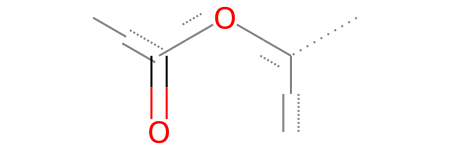

In [54]:
Chem.MolFromSmarts('[C][C](=[O])[O][CH]([CH])[CH]')

In [ ]:
# Fragments [CH][CH]([OH])[CH]([OH])[CH2][O] [C]=[CH][CH2][CH]([C])[C] 11.358395

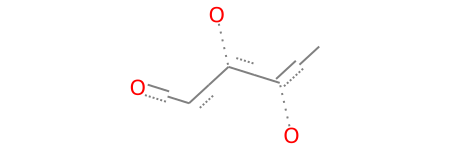

In [55]:
Chem.MolFromSmarts('[CH][CH]([OH])[CH]([OH])[CH2][O]')

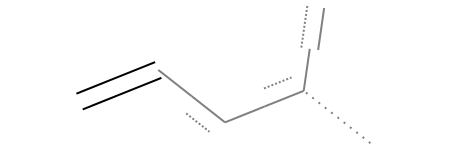

In [56]:
Chem.MolFromSmarts('[C]=[CH][CH2][CH]([C])[C]')

In [ ]:
#Fragments [C]=[CH][CH2][CH]([C])[C] [C][C](=[O])[O][CH]([CH])[O] 11.336668

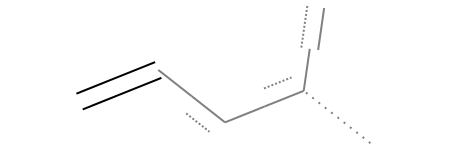

In [57]:
Chem.MolFromSmarts('[C]=[CH][CH2][CH]([C])[C]')

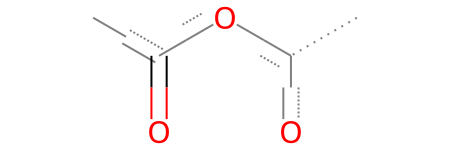

In [58]:
Chem.MolFromSmarts('[C][C](=[O])[O][CH]([CH])[O]')

In [ ]:
#Fragments [CH2]=[C]([C](=[O])[O])[CH]([CH])[CH] [CH2]=[C]([C](=[O])[O])[CH]([CH])[CH] 11.309043

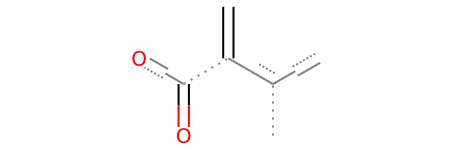

In [59]:
Chem.MolFromSmarts('[CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]')

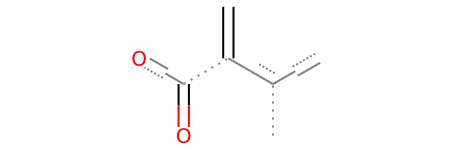

In [60]:
Chem.MolFromSmarts('[CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]')

## More occuring fragments in ZINC than COCONUT

In [ ]:
difference_pkld_profile.df.nsmallest(50,"value")

value
feature1                                    feature2                                              
[c][NH][C](=[O])[CH2][S]                    [c][n][n][c]([n])[S]                        -12.511538
[c][N]([S])[CH2][C]([NH])=[O]               [c][N]([S])[CH2][C]([NH])=[O]               -12.146732
[CH]=[c]([c])[s][c](=[N])[n]                [CH]=[c]([c])[s][c](=[N])[n]                -11.669071
                                            [c][CH]=[c]([s][c])[c]([n])=[O]             -11.647691
[CH]=[c]([s])[c](=[O])[n]([c])[CH]          [CH]=[c]([s])[c](=[O])[n]([c])[CH]          -11.642181
[C][N]=[c]([s][c])[n]([c])[CH]              [C][N]=[c]([s][c])[n]([c])[CH]              -11.640800
[CH]=[c]([c])[s][c](=[N])[n]                [CH]=[c]([s])[c](=[O])[n]([c])[CH]          -11.638495
[CH]=[c]([s])[c](=[O])[n]([c])[CH]          [c][CH]=[c]([s][c])[c]([n])=[O]             -11.622262
[C][CH2][S][c]([n])[n]                      [c][n][n][c]([CH2])[n]                      -11.594472
[CH]=[c]([c])[s][c](=[N])[n]                [C][N]=[c]([s][c])[n]([c])[CH]              -11.586848
[CH]=[c]([s])[c](=[O])[n]([c])[CH]          [C][N]=[c]([s][c])[n]([c])[CH]              -11.586848
[C][N]=[c]([s][c])[n]([c])[CH]              [c][CH]=[c]([s][c])[c]([n])=[O]             -11.568567
[cH][c]([cH])[NH][C]([CH2])=[O]             [c][n][n][c]([n])[S]                        -11.412794
[c]-[n]([c])[c]([n][n])[S][CH2]             [c][NH][C](=[O])[CH2][S]                    -11.372876
[C][N]([CH2])[CH]([CH3])[C]([NH])=[O]       [c][CH2][N]([C]([CH2])=[O])[CH]([C])[CH3]   -11.359507
[c][CH2][N]([C]([CH2])=[O])[CH]([C])[CH3]   [c][CH2][N]([C]([CH2])=[O])[CH]([C])[CH3]   -11.359507
[c]-[c]([n])[n][n][c]                       [c][NH][C](=[O])[CH2][S]                    -11.336378
[C]=[C]([CH3])[N]=[c]([n])[s]               [C]=[C]([CH3])[N]=[c]([n])[s]               -11.311716
                                            [C][C]([CH])=[C]([CH3])[N]=[c]              -11.311138
                                            [C][N]=[c]([s][c])[n]([c])[CH]              -11.311138
[C][C]([CH])=[C]([CH3])[N]=[c]              [C][C]([CH])=[C]([CH3])[N]=[c]              -11.311138
                                            [C][N]=[c]([s][c])[n]([c])[CH]              -11.311138
[C][CH2][S][c]([n])[n]                      [c][n]([CH2])[c]([n][n])[S][CH2]            -11.286625
[CH]=[c]([c])[s][c](=[N])[n]                [C]=[C]([CH3])[N]=[c]([n])[s]               -11.249662
                                            [C][C]([CH])=[C]([CH3])[N]=[c]              -11.249058
[CH]=[c]([s])[c](=[O])[n]([c])[CH]          [C]=[C]([CH3])[N]=[c]([n])[s]               -11.249058
                                            [C][C]([CH])=[C]([CH3])[N]=[c]              -11.249058
[C]=[C]([CH3])[N]=[c]([n])[s]               [c][CH]=[c]([s][c])[c]([n])=[O]             -11.230819
[C][C]([CH])=[C]([CH3])[N]=[c]              [c][CH]=[c]([s][c])[c]([n])=[O]             -11.230207
[c][N]([S])[CH2][C]([NH])=[O]               [c][cH][cH][cH][cH]                         -11.198018
[cH][c]([cH])-[n]([c]([n])[S])[c]([c])=[O]  [c]-[n]([c])[c]([n][c])[S][CH2]             -11.187338
[c][cH][cH][c]([cH])[NH]                    [c][n][n][c]([n])[S]                        -11.176583
[c][S][CH2][C]([NH])=[O]                    [c][n][n][c]([CH2])[n]                      -11.175947
[c][N]([CH2])[S](=[O])(=[O])[c]([cH])[cH]   [c][N]([S])[CH2][C]([NH])=[O]               -11.169574
[C]=[C]([CH])[C](=[O])[O][CH2]              [C][N]=[c]([s][c])[n]([c])[CH]              -11.157398
[c][NH][C](=[O])[CH2][N]                    [c][N]([S])[CH2][C]([NH])=[O]               -11.150299
[C][CH]([c])[n]([c]([c])=[O])[c](=[N])[s]   [C][CH]([c])[n]([c]([c])=[O])[c](=[N])[s]   -11.139258
                                            [C][N]=[c]([s][c])[n]([c])[CH]              -11.139258
[C]=[C]([CH])[C](=[O])[O][CH2]              [c][CH]=[c]([s][c])[c]([n])=[O]             -11.131414
[CH]=[c]([c])[s][c](=[N])[n]      

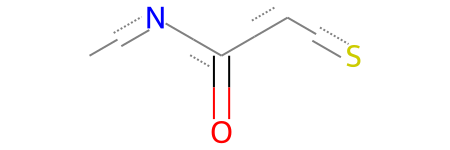

In [61]:
# [c][NH][C](=[O])[CH2][S]	[c][n][n][c]([n])[S]	-12.511538
Chem.MolFromSmarts('[c][NH][C](=[O])[CH2][S]')

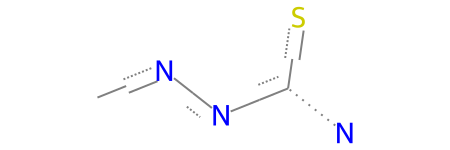

In [62]:
Chem.MolFromSmarts('[c][n][n][c]([n])[S]')

In [ ]:
# [c][N]([S])[CH2][C]([NH])=[O]	[c][N]([S])[CH2][C]([NH])=[O]	-12.146732

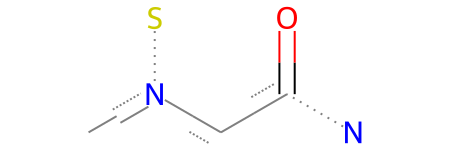

In [63]:
Chem.MolFromSmarts('[c][N]([S])[CH2][C]([NH])=[O]')

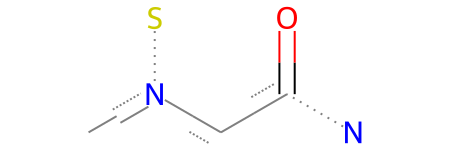

In [64]:
Chem.MolFromSmarts('[c][N]([S])[CH2][C]([NH])=[O]')

In [ ]:
# [CH]=[c]([c])[s][c](=[N])[n]	[CH]=[c]([c])[s][c](=[N])[n]	-11.669071

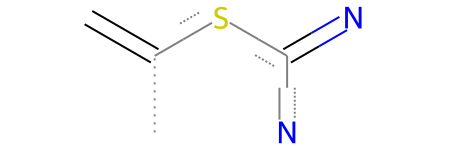

In [65]:
Chem.MolFromSmarts('[CH]=[c]([c])[s][c](=[N])[n]')

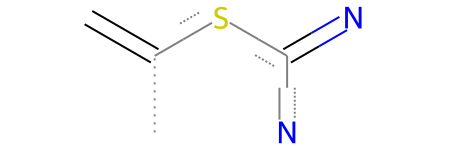

In [66]:
Chem.MolFromSmarts('[CH]=[c]([c])[s][c](=[N])[n]')

In [ ]:
# [CH]=[c]([c])[s][c](=[N])[n] [c][CH]=[c]([s][c])[c]([n])=[O]	-11.647691

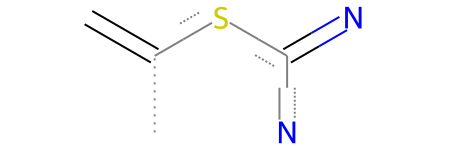

In [67]:
Chem.MolFromSmarts('[CH]=[c]([c])[s][c](=[N])[n]')

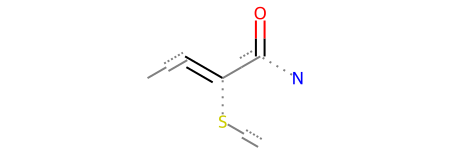

In [68]:
Chem.MolFromSmarts('[c][CH]=[c]([s][c])[c]([n])=[O]')

In [ ]:
# [CH]=[c]([s])[c](=[O])[n]([c])[CH]	[CH]=[c]([s])[c](=[O])[n]([c])[CH]	-11.642181

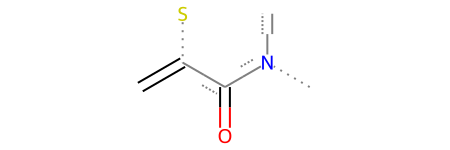

In [69]:
Chem.MolFromSmarts('[CH]=[c]([s])[c](=[O])[n]([c])[CH]')

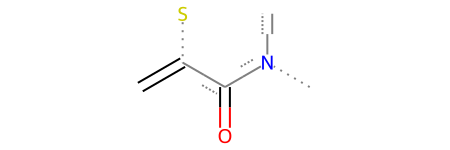

In [70]:
Chem.MolFromSmarts('[CH]=[c]([s])[c](=[O])[n]([c])[CH]')

In [ ]:
# [C][N]=[c]([s][c])[n]([c])[CH]	[C][N]=[c]([s][c])[n]([c])[CH]	-11.640800

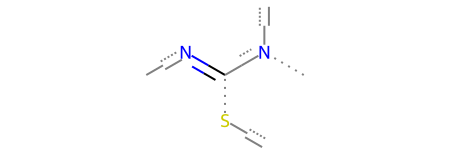

In [71]:
Chem.MolFromSmarts('[C][N]=[c]([s][c])[n]([c])[CH]')

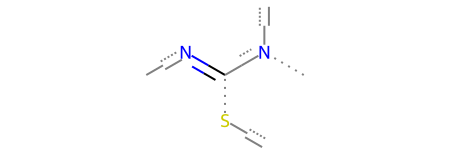

In [72]:
Chem.MolFromSmarts('[C][N]=[c]([s][c])[n]([c])[CH]')

In [ ]:
# [CH]=[c]([c])[s][c](=[N])[n]	[CH]=[c]([s])[c](=[O])[n]([c])[CH]	-11.638495

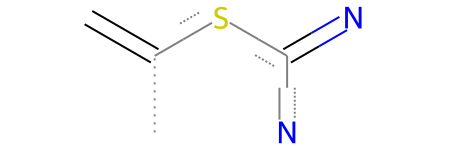

In [73]:
Chem.MolFromSmarts('[CH]=[c]([c])[s][c](=[N])[n]')

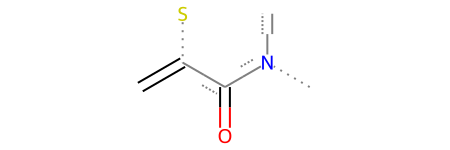

In [74]:
Chem.MolFromSmarts('[CH]=[c]([s])[c](=[O])[n]([c])[CH]')

In [ ]:
# [CH]=[c]([s])[c](=[O])[n]([c])[CH]	[c][CH]=[c]([s][c])[c]([n])=[O]	-11.622262

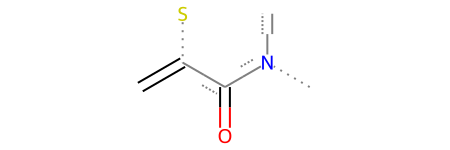

In [75]:
Chem.MolFromSmarts('[CH]=[c]([s])[c](=[O])[n]([c])[CH]')

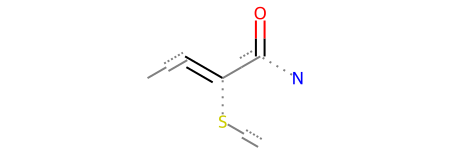

In [76]:
Chem.MolFromSmarts('[c][CH]=[c]([s][c])[c]([n])=[O]')

In [ ]:
# [C][CH2][S][c]([n])[n]	[c][n][n][c]([CH2])[n]	-11.594472

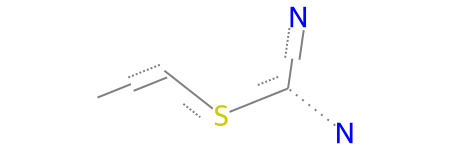

In [77]:
Chem.MolFromSmarts('[C][CH2][S][c]([n])[n]')

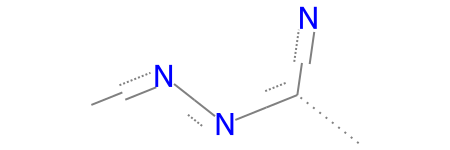

In [78]:
Chem.MolFromSmarts('[c][n][n][c]([CH2])[n]')

In [ ]:
# [CH]=[c]([c])[s][c](=[N])[n]	[C][N]=[c]([s][c])[n]([c])[CH]	-11.586848

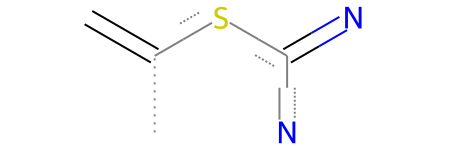

In [79]:
Chem.MolFromSmarts('[CH]=[c]([c])[s][c](=[N])[n]')

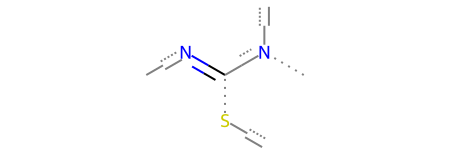

In [80]:
Chem.MolFromSmarts('[C][N]=[c]([s][c])[n]([c])[CH]')